# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = total_fares/total_rides
average_fare_per_ride.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [11]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares/total_drivers
average_fare_per_driver.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [12]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides, "Total Drivers": total_drivers, "Total Fares": total_fares, "Average Fare per Ride": average_fare_per_ride,"Average Fare per Driver": average_fare_per_driver})

In [13]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [14]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [17]:
# 1. Read the merged DataFrame
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
2365,Lake Jamie,2019-04-19 04:32:47,16.29,3518682119233,4,Rural
2366,North Holly,2019-03-18 10:38:05,40.34,3787775176860,8,Rural
2367,Michaelberg,2019-01-27 18:43:05,38.42,862622008020,6,Rural
2368,Lake Jamie,2019-04-29 01:58:44,54.22,2489264790267,4,Rural
2369,Bradshawfurt,2019-01-30 10:55:23,51.39,1328274868072,7,Rural
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298,1,Rural


In [18]:
pyber_data_df.tail(10)

,city,date,fare,ride_id,driver_count,type
2365,Lake Jamie,2019-04-19 04:32:47,16.29,3518682119233,4,Rural
2366,North Holly,2019-03-18 10:38:05,40.34,3787775176860,8,Rural
2367,Michaelberg,2019-01-27 18:43:05,38.42,862622008020,6,Rural
2368,Lake Jamie,2019-04-29 01:58:44,54.22,2489264790267,4,Rural
2369,Bradshawfurt,2019-01-30 10:55:23,51.39,1328274868072,7,Rural
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298,1,Rural


In [19]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_type_total_fare_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
date_type_total_fare_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [22]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
date_type_total_fare_df = date_type_total_fare_df.reset_index()

In [23]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivottable_df = date_type_total_fare_df.pivot(index='date', columns='type', values='fare')

In [24]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
given_date_df = pyber_pivottable_df.loc['2019-01-01':'2019-04-29']

In [25]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
given_date_df.index = pd.to_datetime(given_date_df.index)

In [28]:
# 7. Check that the datatype for the index is datetime using df.info()
given_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [30]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_by_week_df = given_date_df.resample('W').sum()

Text(0.5, 0, 'Month')

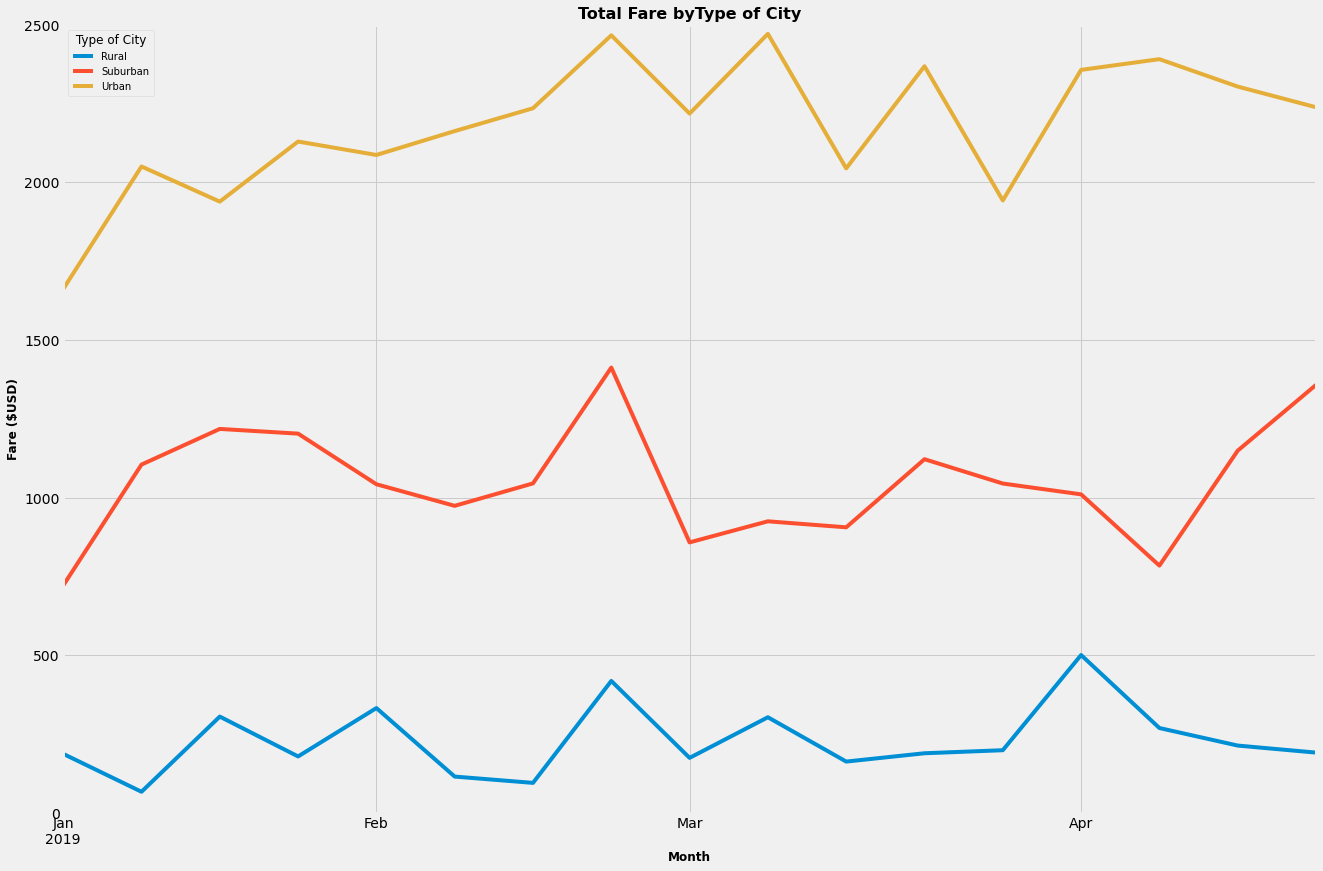

In [31]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fare_by_week_df.plot(figsize=(20, 15))
plt.gcf().subplots_adjust(bottom=0.15)

plt.ylim(0, 2500)

plt.title("Total Fare by Type of City")

lgnd = plt.legend(fontsize="10", loc="best", title=" Type of City ")
lgnd.get_title().set_fontsize(12)

plt.title("Total Fare byType of City", fontsize=16, weight="bold")
plt.ylabel("Fare ($USD)", fontsize=12, weight="bold")
plt.xlabel("Month", fontsize=12, weight="bold")

plt.show()